# Air Pollution Comparison

We complete an air pollution comparison study between numerous geographic areas to understand what areas maintain air quality the best, and how we can replicate the healthy practices that lead to a stronger air quality index (AQI). 

### Table of Contents
* content

### Notebooks
* [Overview Notebook](airpollution.ipynb)
* [Processing Notebook](dataprocessing.ipynb)
* [Analysis Notebook](data-analysis.ipynb)

### Running Data Processing Notebook

We are now going to run the data processing notebook to import a lot of the processing functions we will be using.

In [1]:
%run dataprocessing.ipynb

### Testing Merge Function
* still unable to solve the issue of data gaps because of rolling mean

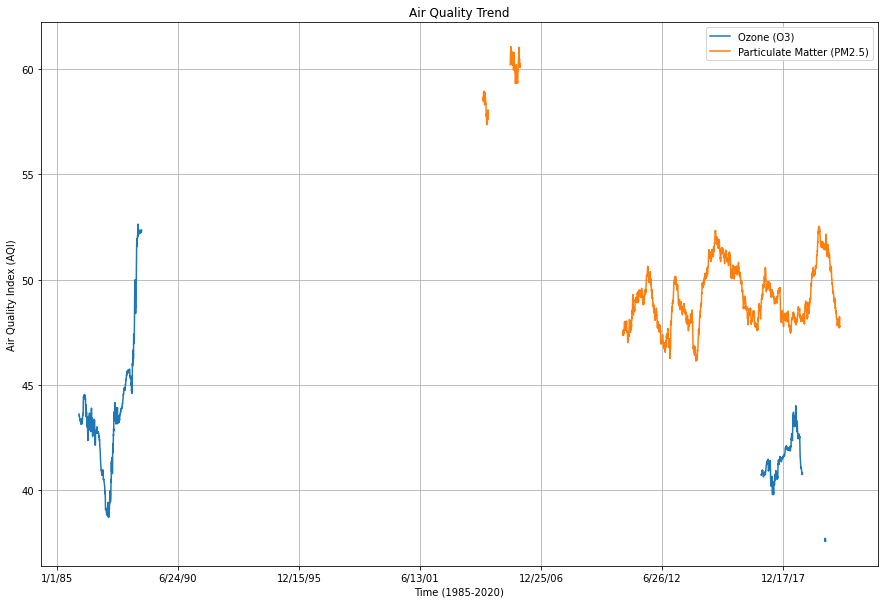

In [2]:
aqi_plot(test4)

### Testing Raw Plots

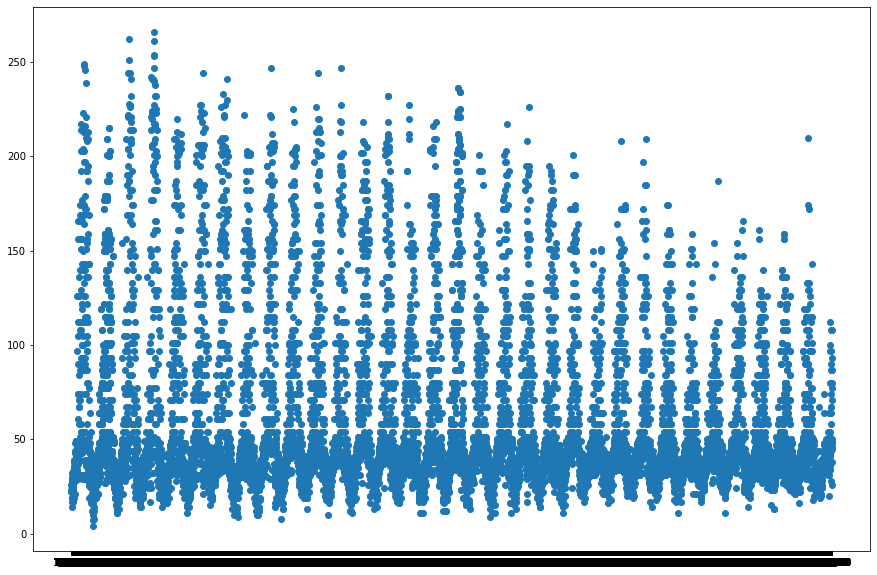

In [3]:
plt.figure(figsize = (15,10))
plt.scatter(ny_nj_pa_files['Date'], ny_nj_pa_files['Ozone_AQI_Value'])

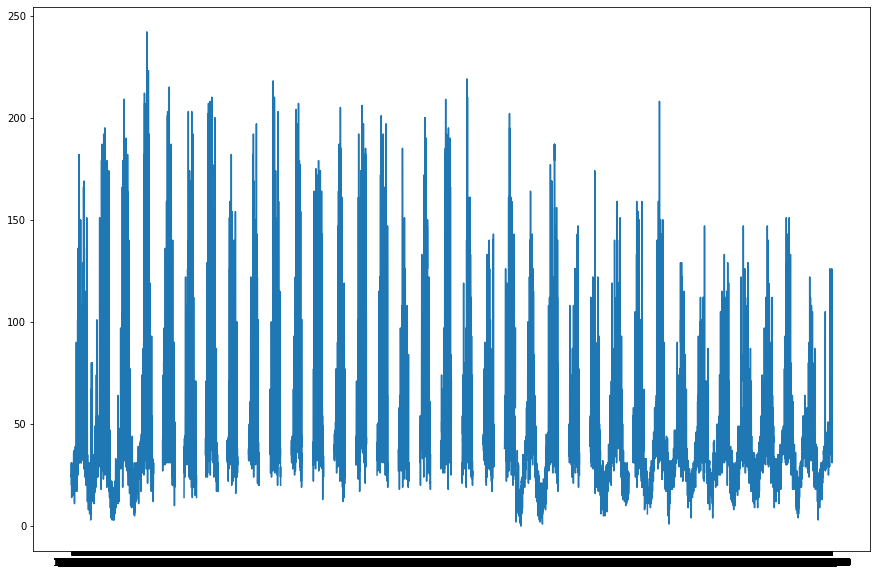

In [4]:
plt.figure(figsize = (15,10))
plt.plot(mi_files['Date'], mi_files['Ozone_AQI_Value'])

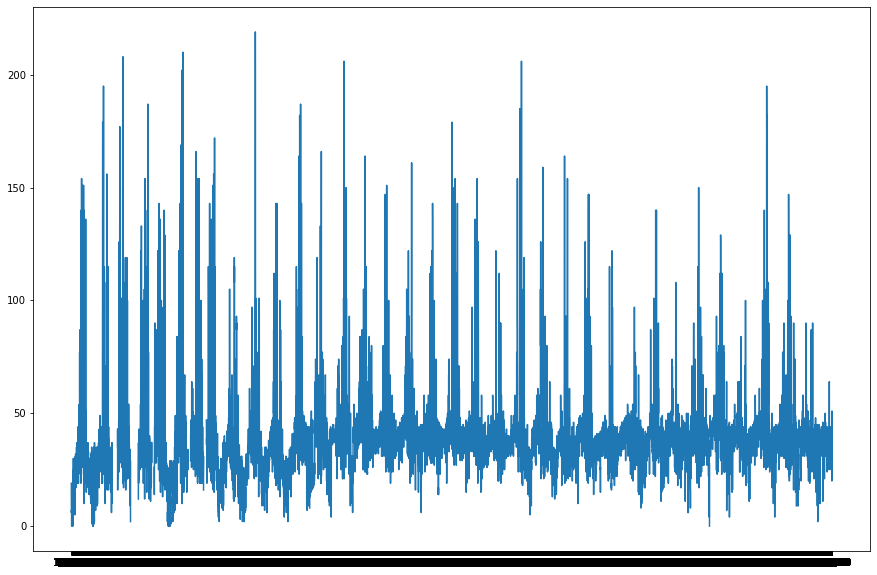

In [5]:
plt.figure(figsize = (15,10))
plt.plot(wa_files['Date'], wa_files['Ozone_AQI_Value'])

### Specific Comparisons

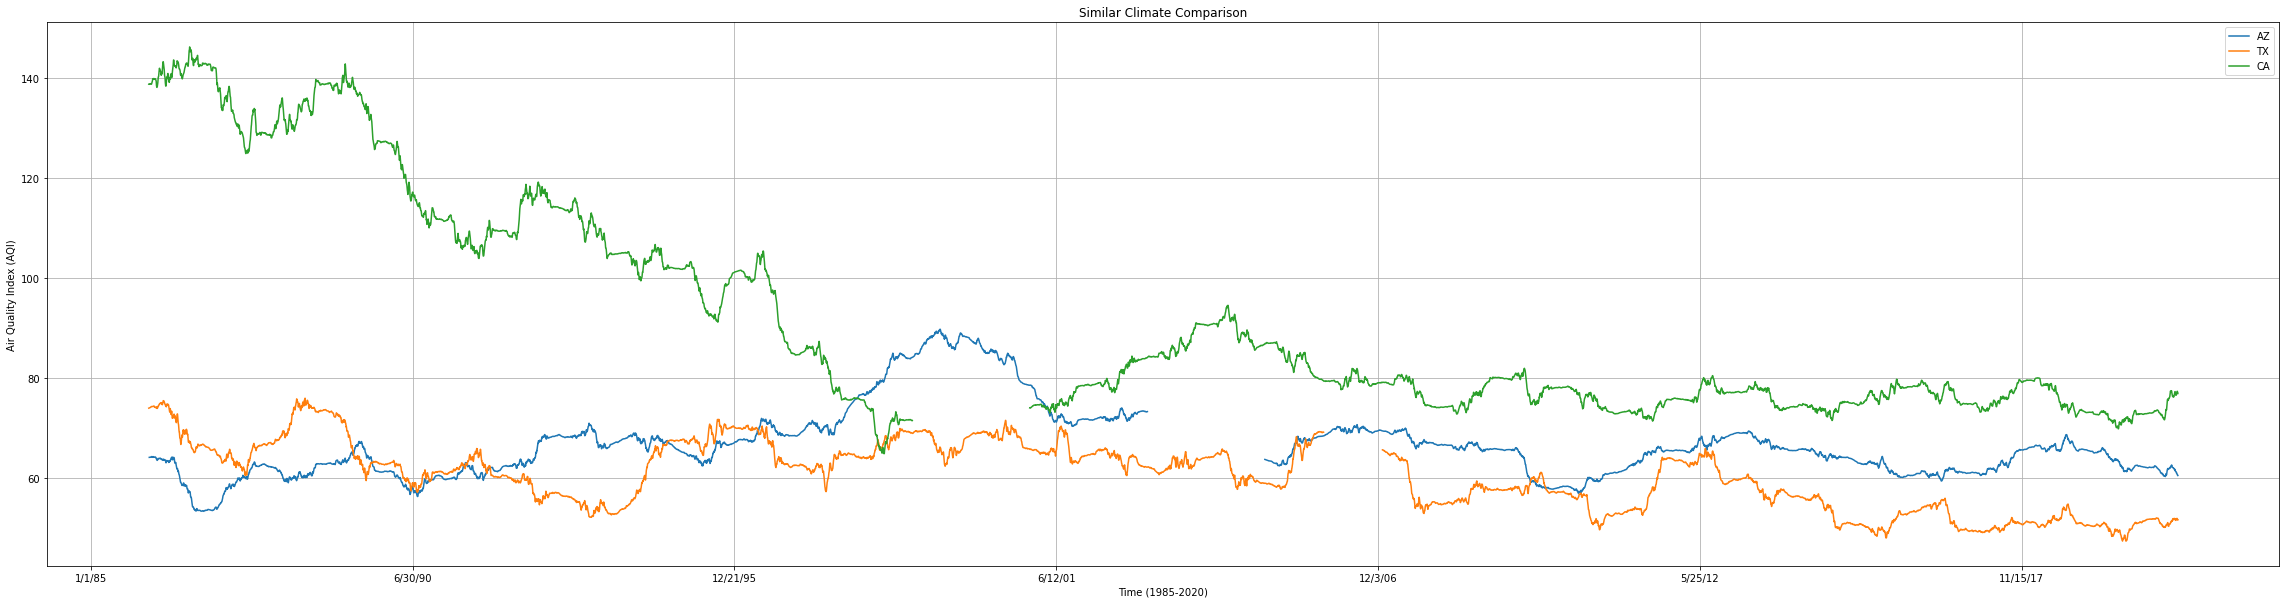

In [10]:
az_tx_ca = [az, tx, ca]
data = az_tx_ca[0]
for f in range (1, len(az_tx_ca)):
        data = pd.merge(data, az_tx_ca[f], how = 'inner', on = 'T')
ax = data.plot.line('T', ['X_x', 'X_y', 'X'], figsize = (40,10), title = 'Ozone Similar Climate Comparison')
ax.legend(['AZ', 'TX', 'CA'])
ax.set_xlabel('Time (1985-2020)')
ax.set_ylabel('Air Quality Index (AQI)')
ax.grid(True)

### Messing Around with Datausa datasets

Here we are cleaning up the data of this dataset to organize the different production rates of certain products over time.

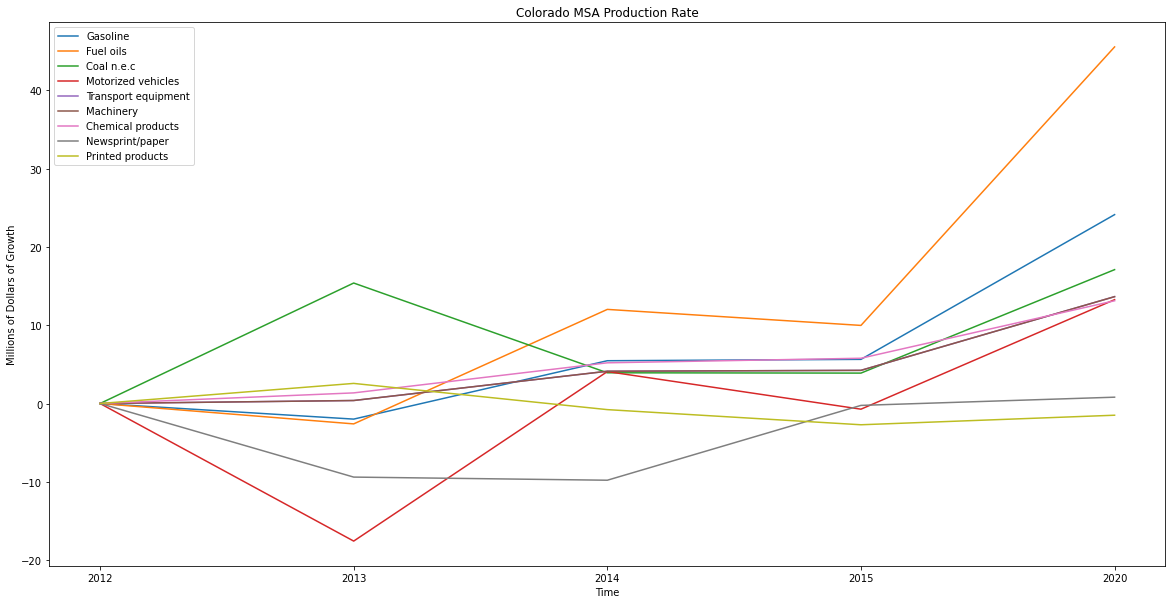

In [146]:
co_production = pd.DataFrame(pd.read_csv('/Users/smaslam/Desktop/airpollution/airpollution/DomesticProduction.csv', sep = r'\s*,\s*', engine = 'python'))

def production_trend(place, y):
    x = place.sort_values(by = ['ID SCTG2', 'Year'], ascending = True)
    gasoline = [x.iat[140, 8], x.iat[141, 8], x.iat[142, 8], x.iat[143, 8], x.iat[144, 8]]
    fuel_oils = [x.iat[150, 8], x.iat[151, 8], x.iat[152, 8], x.iat[153, 8], 
        x.iat[154, 8]]
    coal_nec = [x.iat[160, 8], x.iat[161, 8], x.iat[162, 8], x.iat[163, 8], 
        x.iat[164, 8]]
    motorized_vehicles = [x.iat[340, 8], x.iat[341, 8], x.iat[342, 8], x.iat[343, 8], 
        x.iat[344, 8]]
    transport_equip = [x.iat[310, 8], x.iat[311, 8], x.iat[312, 8], x.iat[313, 8], 
        x.iat[314, 8]]
    machinery = [x.iat[310, 8], x.iat[311, 8], x.iat[312, 8], x.iat[313, 8], 
        x.iat[314, 8]]
    chemical_prods = [x.iat[200, 8], x.iat[201, 8], x.iat[202, 8], x.iat[203, 8], 
        x.iat[204, 8]]
    newsprint_paper = [x.iat[240, 8], x.iat[241, 8], x.iat[242, 8], x.iat[243, 8], 
        x.iat[244, 8]]
    printed_prods = [x.iat[260, 8], x.iat[261, 8], x.iat[262, 8], x.iat[263, 8], 
        x.iat[264, 8]]
    time = ['2012', '2013', '2014', '2015', '2020']
         
    plt.figure(figsize=(20, 10))
    plt.plot(time, gasoline)
    plt.plot(time, fuel_oils)
    plt.plot(time, coal_nec)
    plt.plot(time, motorized_vehicles)
    plt.plot(time, transport_equip)
    plt.plot(time, machinery)
    plt.plot(time, chemical_prods)
    plt.plot(time, newsprint_paper)
    plt.plot(time, printed_prods)
    plt.title(y)
    plt.xlabel('Time')
    plt.ylabel('Millions of Dollars of Growth')
    plt.legend(['Gasoline', 'Fuel oils', 'Coal n.e.c', 'Motorized vehicles', 'Transport equipment', 'Machinery'
               , 'Chemical products', 'Newsprint/paper', 'Printed products'])

production_trend(co_production, 'Colorado MSA Production Rate')